# Переобучение на сайте playground.tensorflow

* Круг

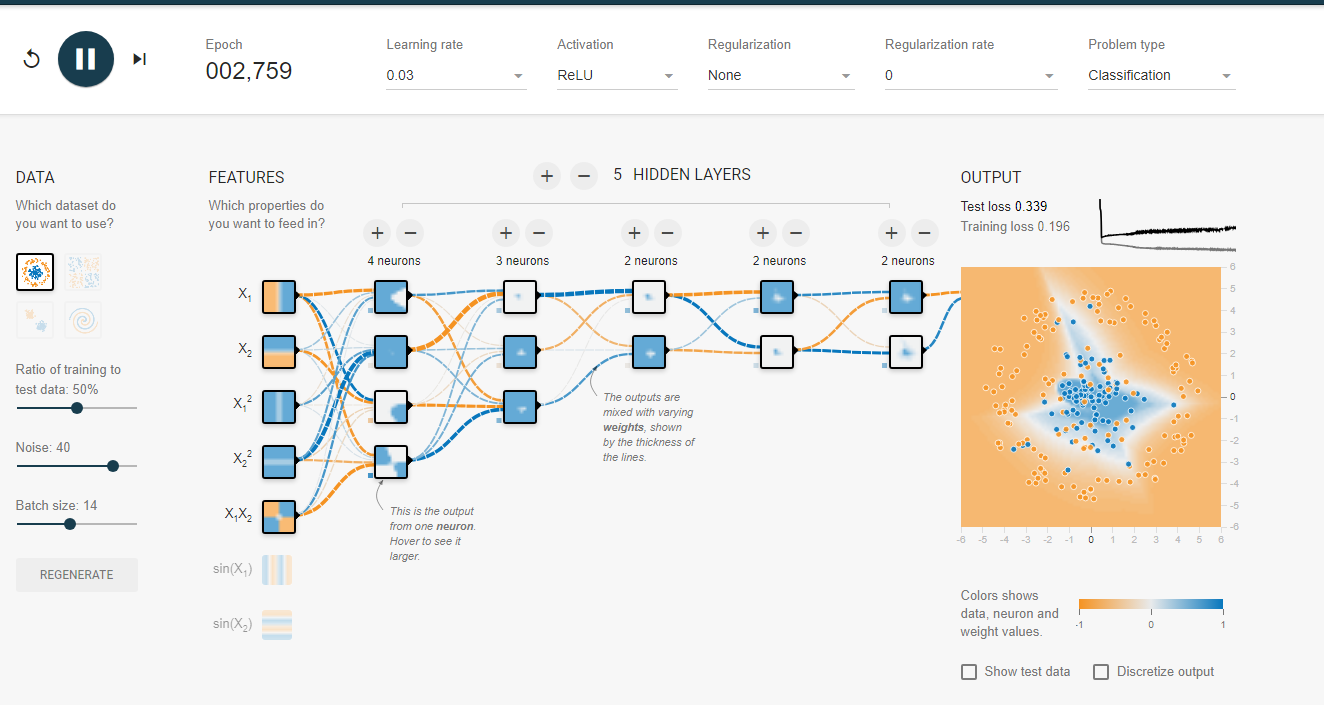

* XOR

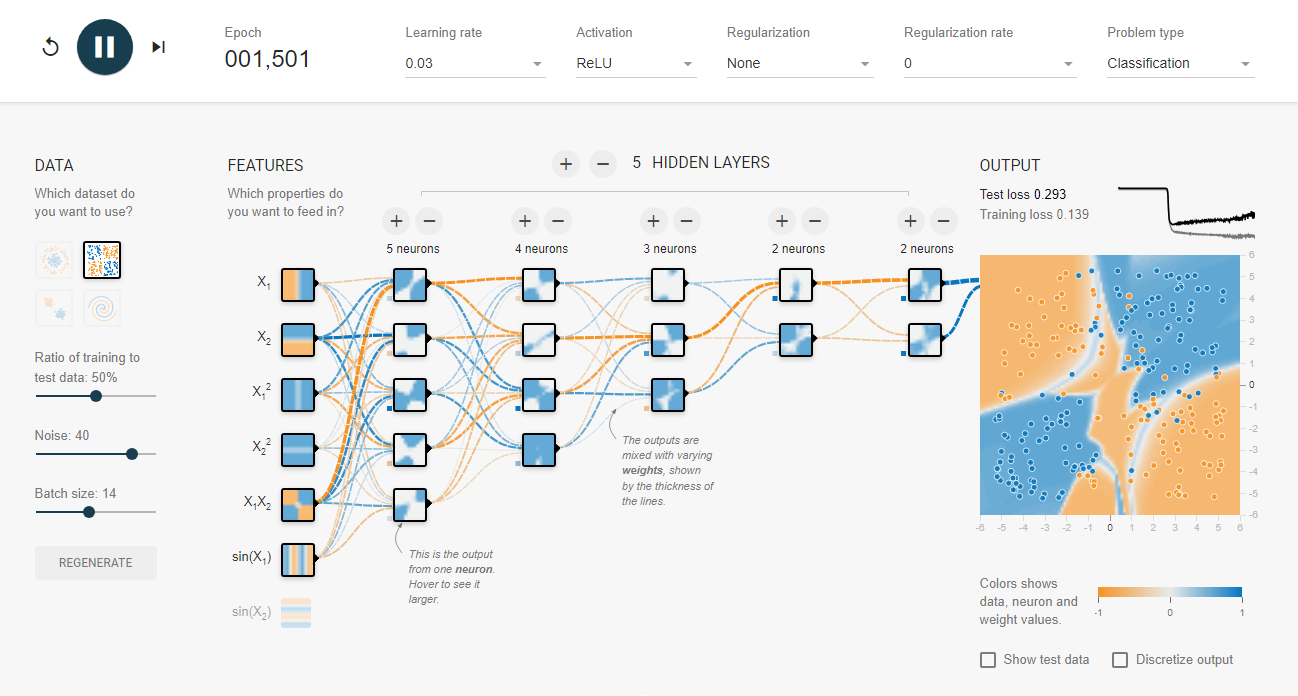

* Гауссовское распределение

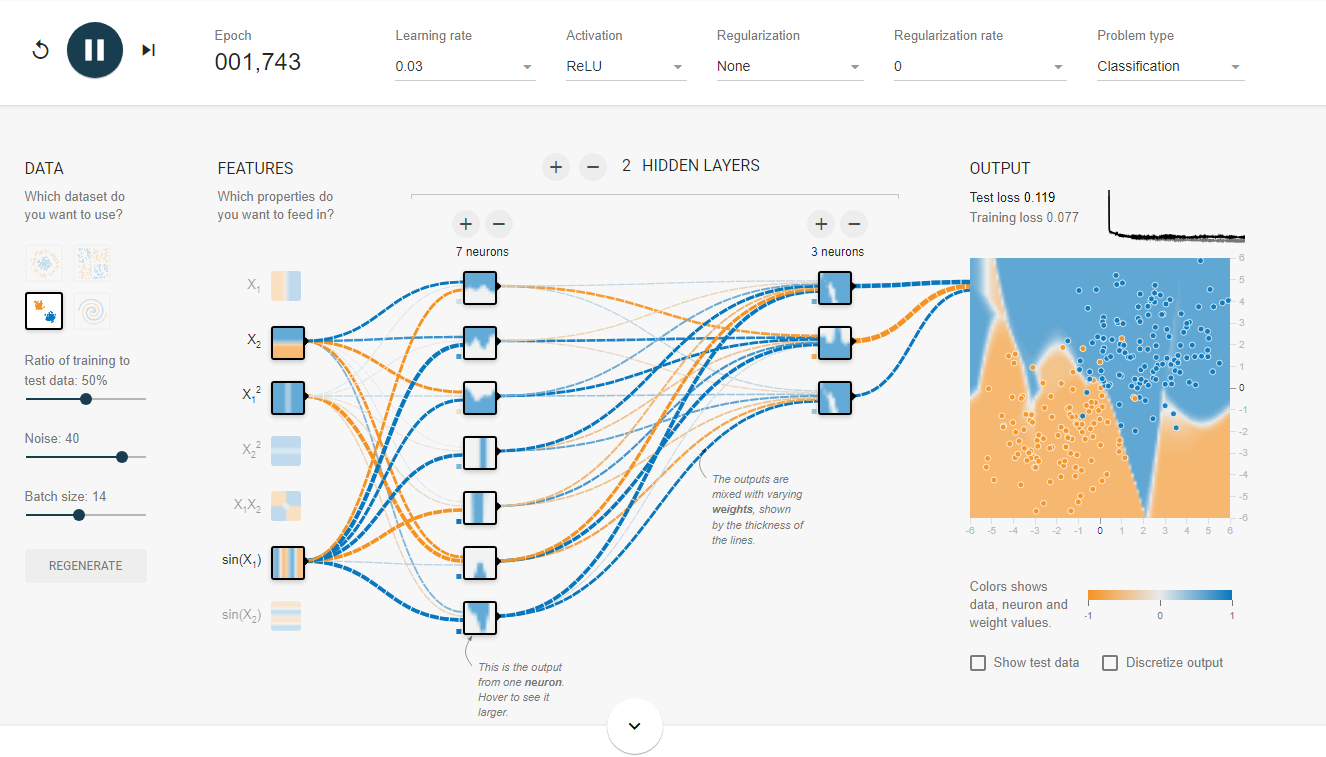

* Спираль

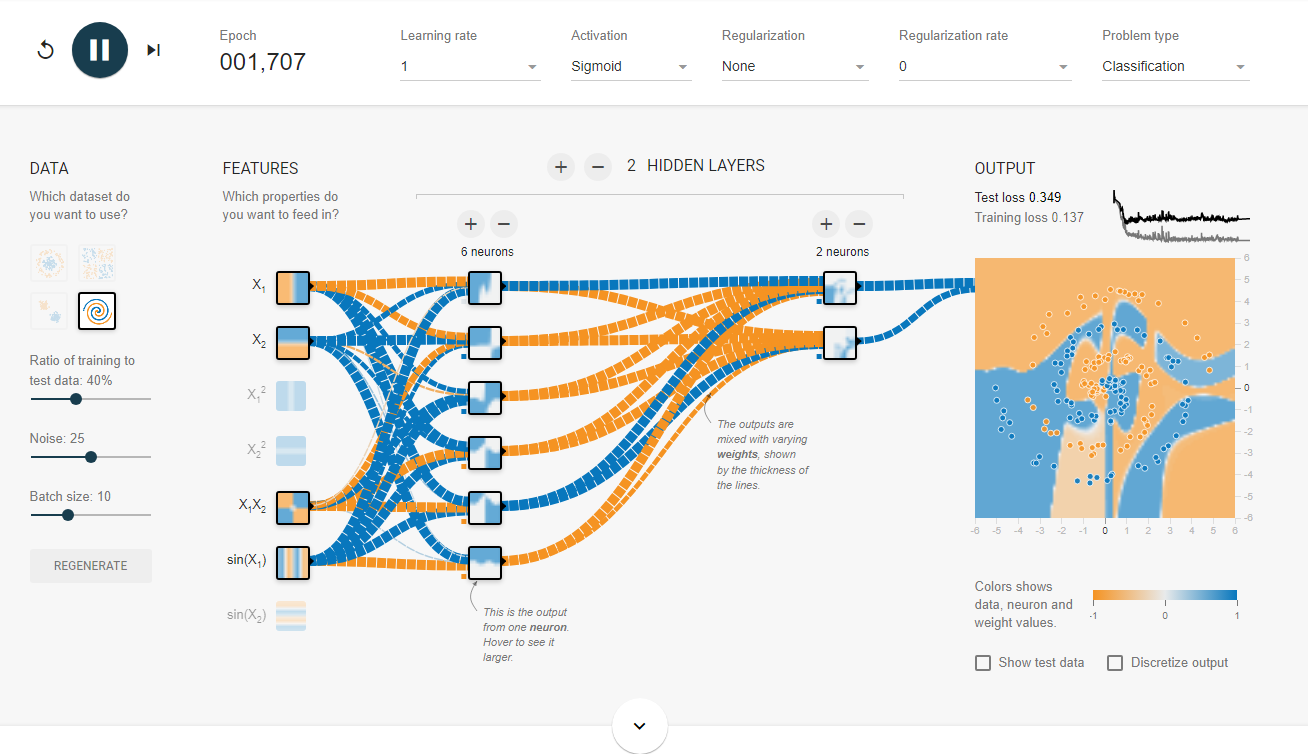

# Вычислительный граф модели

## Граф

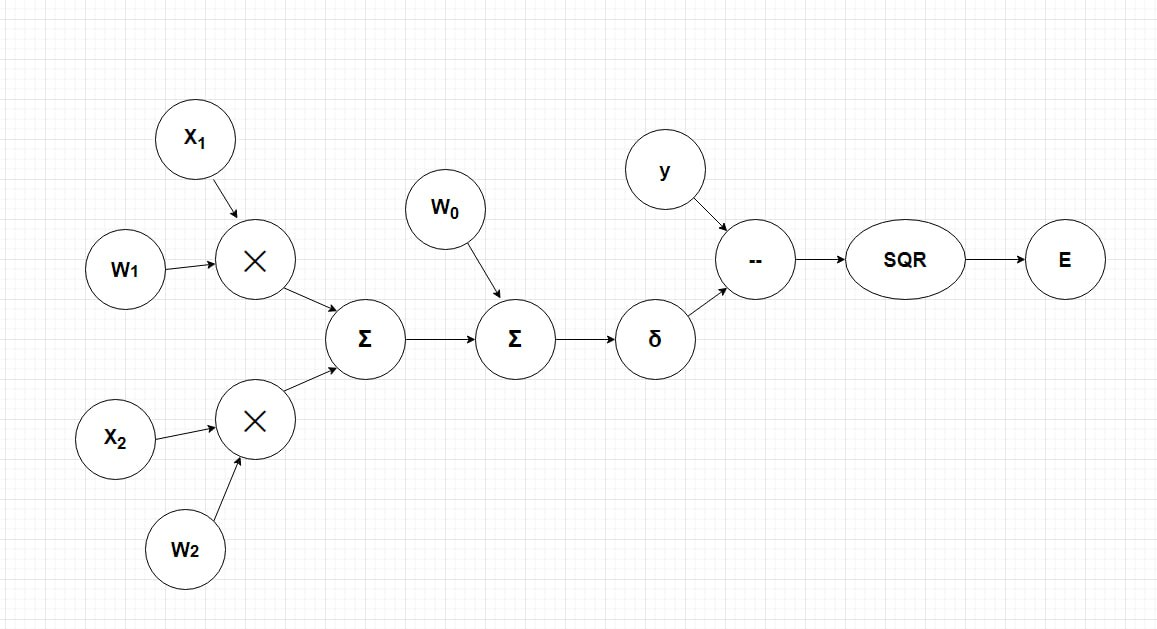

## Вычисления

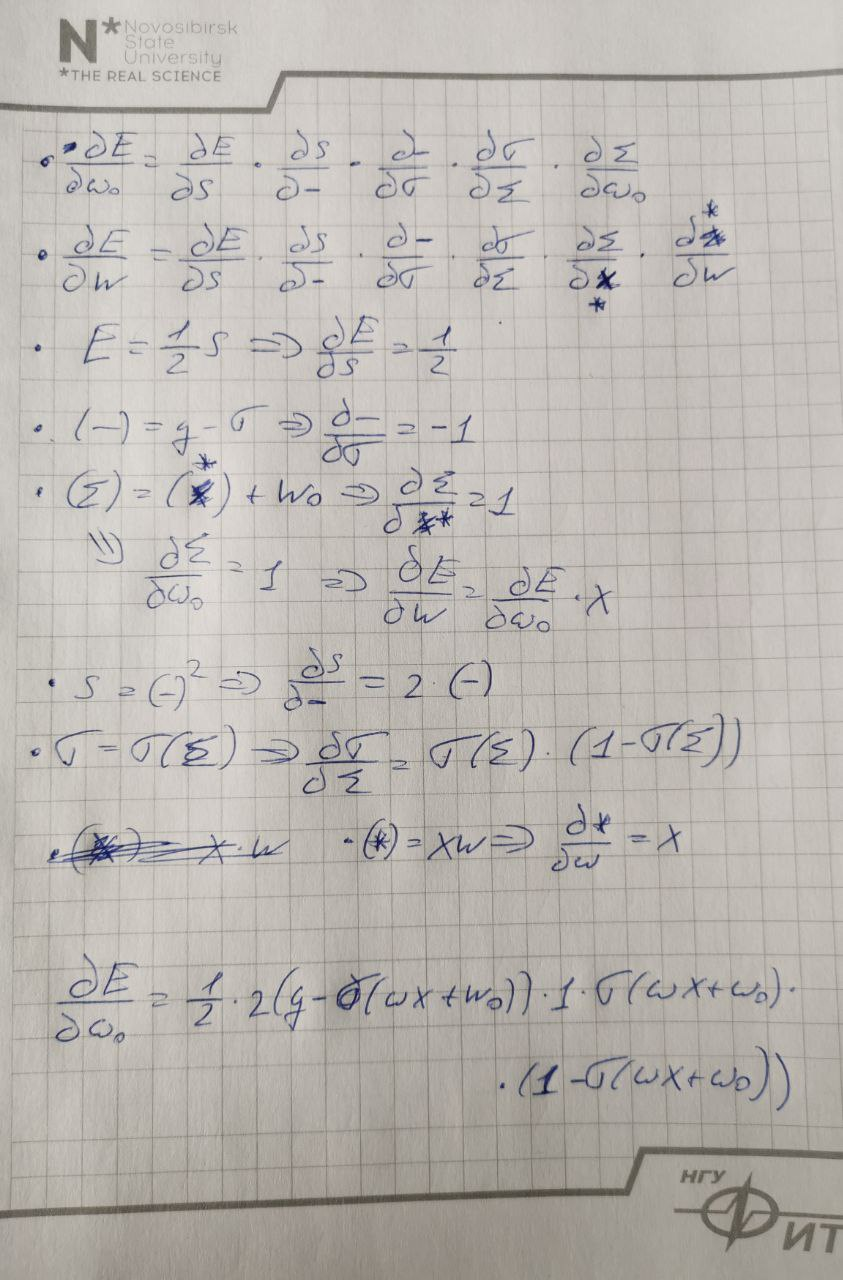

# Реализация элементарного перцептрона

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Генерация выборок

In [ ]:
def circle(n=1000, noise=0.01):
    radius = 5
    x1 = []
    x2 = []

    def get_circle_label(p, center):
        return 1 if np.linalg.norm([p[0] - center[0], p[1] - center[1]]) < (radius * 0.5) else 0

    for _ in range(n // 2):
        r = np.random.uniform(0, radius * 0.5)
        angle = np.random.uniform(0, 2 * np.pi)
        x = r * np.sin(angle)
        y = r * np.cos(angle)
        noise_x = np.random.uniform(-radius, radius) * noise
        noise_y = np.random.uniform(-radius, radius) * noise
        label = get_circle_label([x + noise_x, y + noise_y], [0, 0])
        point = [x, y]
        x1.append(point) if label == 0 else x2.append(point)

    for _ in range(n // 2):
        r = np.random.uniform(radius * 0.7, radius)
        angle = np.random.uniform(0, 2 * np.pi)
        x = r * np.sin(angle)
        y = r * np.cos(angle)
        noise_x = np.random.uniform(-radius, radius) * noise
        noise_y = np.random.uniform(-radius, radius) * noise
        label = get_circle_label([x + noise_x, y + noise_y], [0, 0])
        point = [x, y]
        x1.append(point) if label == 0 else x2.append(point)

    x1 = np.array(x1)
    x2 = np.array(x2)

    return x1, x2


In [ ]:
def xor(n=200, noise=0.1):
    def get_xor_label(p):
        return 1 if p[0] * p[1] >= 0 else 0

    x1 = []
    x2 = []
    for _ in range(n):
        x = np.random.uniform(-5, 5)
        padding = 0.3
        x += padding if x > 0 else -padding
        y = np.random.uniform(-5, 5)
        y += padding if y > 0 else -padding
        noise_x = np.random.uniform(-5, 5) * noise
        noise_y = np.random.uniform(-5, 5) * noise
        label = get_xor_label([x + noise_x, y + noise_y])
        x1.append([x, y]) if label == 0 else x2.append([x,y])

    x1 = np.array(x1)
    x2 = np.array(x2)

    return x1, x2

In [ ]:
def gaussian(n_points=200, noise=0.1):
    center1 = np.array([1, 1])
    center2 = np.array([-1, -1])
    radius = 0.3*noise

    X1 = np.random.randn(n_points // 2, 2) * radius + center1
    X2 = np.random.randn(n_points // 2, 2) * radius + center2

    return X1 + np.random.uniform(-noise, noise, X1.shape), X2 + np.random.uniform(-noise, noise, X2.shape)

In [ ]:
def spiral(n_points=100, noise=0.2):
    n_points //= 2
    n = np.sqrt(np.random.rand(n_points, 1)) * 720 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise

    d2x = np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d2y = -np.sin(n) * n + np.random.rand(n_points, 1) * noise

    return np.hstack((d1x, d1y)),  np.hstack((d2x, d2y))

## Функция отображения выборки

In [ ]:
def print_dataset(x1,x2):
  plt.figure(figsize=(8, 8))
  plt.scatter(x1[:, 0], x1[:, 1], c='b', label='Class blue')
  plt.scatter(x2[:, 0], x2[:, 1], c='r', label='Class red')
  plt.title('Generated Data')
  plt.legend()
  plt.grid(True)
  plt.show()

### Пример генерации выборки

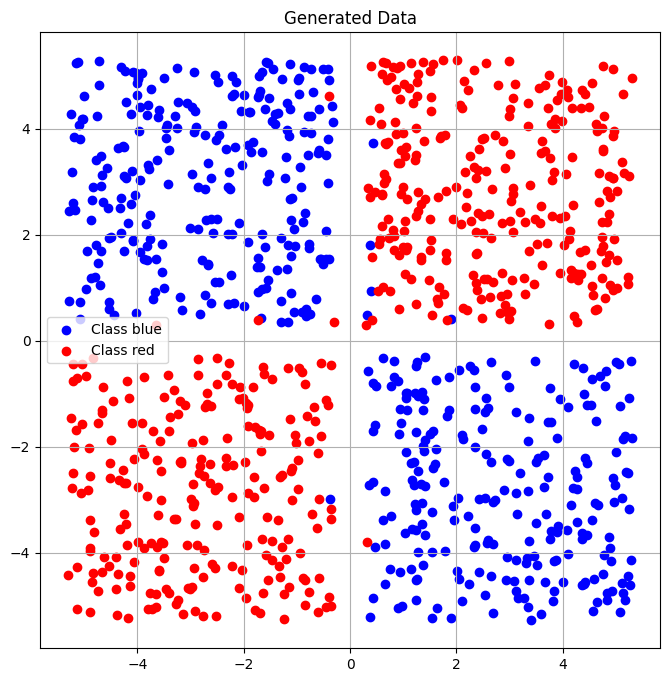

In [ ]:
x1, x2 = xor(1000, 0.1)

print_dataset(x1,x2)

## Функции активации

* Ступенчетая функция активации

In [ ]:
def step_func_forward(x):
    return np.where(x >= 0, 1, 0)

def step_func_backward(x):
    return 0.0

* Сигмоидальная функция активации

In [ ]:
def sigmoid_func_forward(x):
    return 1 / (1 + np.exp(-np.clip(x, -20, 20)))

def sigmoid_func_backward(x):
    return sigmoid_func_forward(x) * (1 - sigmoid_func_forward(x))

## Элементарный **перцептрон**

In [ ]:
class Perceptron:
  def __init__(self, n, activation='sigmoid', method='theorem'):
      self.w = np.zeros(n)
      self.w0 = 0
      self.activation_forward = step_func_forward if activation == 'step' else sigmoid_func_forward
      self.activation_backward = step_func_backward if activation == 'step' else sigmoid_func_backward
      self.method = method

  def fit(self, x, y, epochs=40):
    for _ in np.arange(0, epochs):
      for i in range(x.shape[0]):
        linear_comb = np.dot(x[i], self.w) + self.w0
        prediction = self.activation_forward(linear_comb)
        error = ((y[i] - prediction) if self.method == 'theorem' else (y[i] -  prediction)*self.activation_backward(linear_comb))
        self.w += 0.01 * error * x[i]
        self.w0 += 0.01 * error

  def predict(self, x):
    return self.activation_forward(np.dot(x, self.w) + self.w0)

## **Ансамбль** перцептронов

In [ ]:
class Ensemble:
  def __init__(self, perceptrons):
    self.perceptrons = perceptrons

  def fit(self, x, y, epochs=10):
    if len(self.perceptrons) == 1:
      self.perceptrons[0].fit(x, y, epochs)
      return

    x_parts = np.array_split(x, len(self.perceptrons))
    y_parts = np.array_split(y, len(self.perceptrons))
    for i in range(len(self.perceptrons)):
      self.perceptrons[i].fit(x_parts[i], y_parts[i], epochs)

  def predict(self, x):
    predictions = np.array([perceptron.predict(x) for perceptron in self.perceptrons])
    return np.argmax(np.bincount(np.round(predictions).astype(int)))

## Функция обучения **ансамбля**

In [ ]:
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix


def fit_with_metrics(n, noise, dataset_func, activation, method, ensemble_n):
  x1, x2 = dataset_func(n, noise)

  print_dataset(x1, x2)

  x = np.concatenate((x1,x2))
  y = np.concatenate((np.zeros(n // 2), np.ones(n // 2)))
  x_train, x_test, y_train, y_test = train_test_split(x, y)

  x_parts = np.array_split(x, ensemble_n)

  perceptrons = [Perceptron(np.size(x_parts[i],1), activation, method) for i in range(ensemble_n)]

  ensemble = Ensemble(perceptrons)

  start_t = time()
  ensemble.fit(x_train, y_train)
  end_t = time()

  y_pred = np.zeros(len(y_test))
  for i in range(len(y_test)):
      prediction = ensemble.predict(x_test[i])
      y_pred[i] = round(float(prediction))

  accuracy = accuracy_score(y_test, y_pred)
  matrix = confusion_matrix(y_test, y_pred)

  print(f'Fit time: {end_t - start_t} seconds')
  print(f'Accuracy: {accuracy}')
  ConfusionMatrixDisplay(matrix, display_labels=[0, 1]).plot(include_values=True, cmap='Blues')

  plt.show()

# Тестирование

## Обучение перцептрона по **теореме** с функцией активации **сигмоидой** на выборке **2 круга**

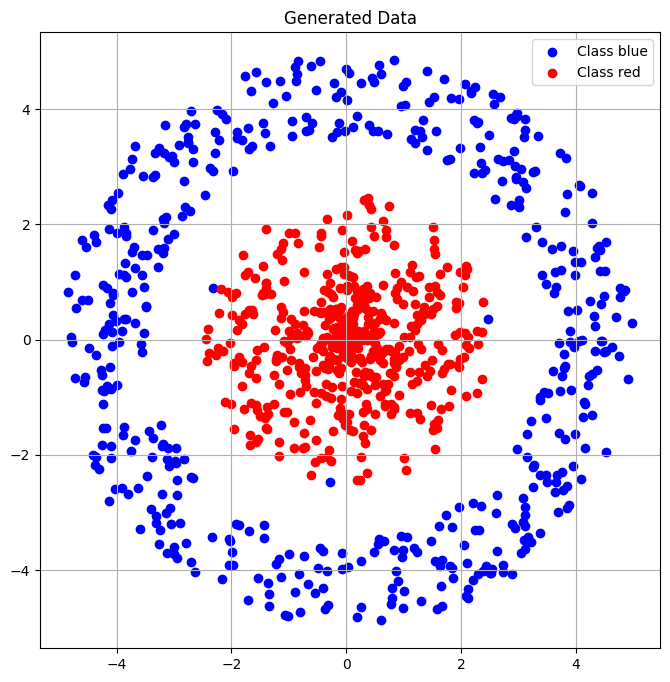

Fit time: 0.11033487319946289 seconds
Accuracy: 0.496


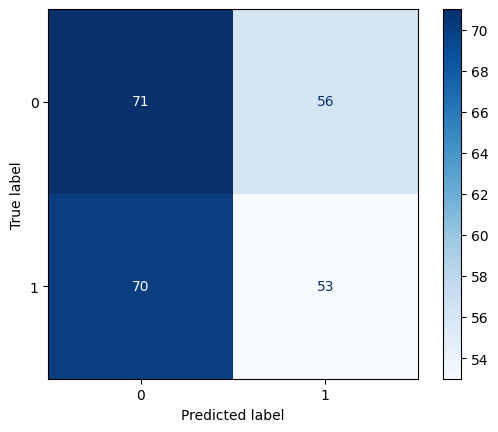

In [ ]:
fit_with_metrics(1000, 0.01, circle, 'sigmoid', 'theorem', 1)

## Обучение перцептрона с помощью **градиентного спуска** с функцией активации **сигмоидой** на выборке **гауссианы**

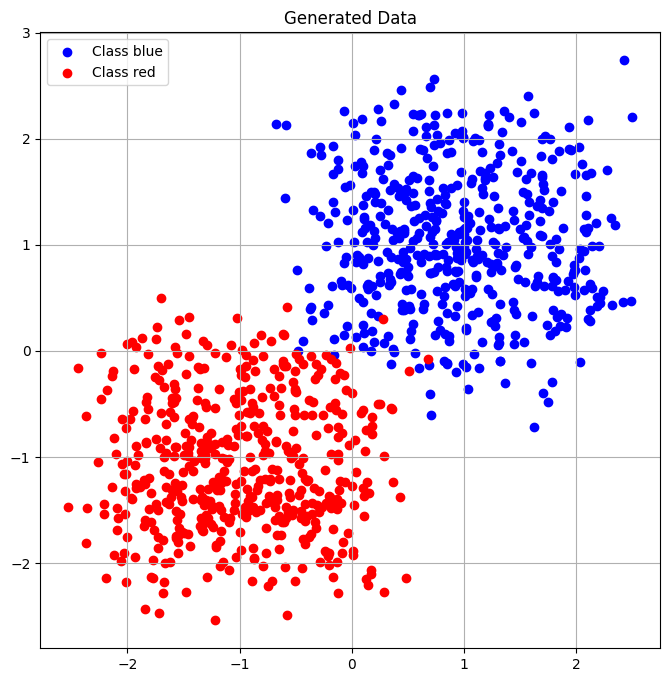

Fit time: 0.26700735092163086 seconds
Accuracy: 1.0


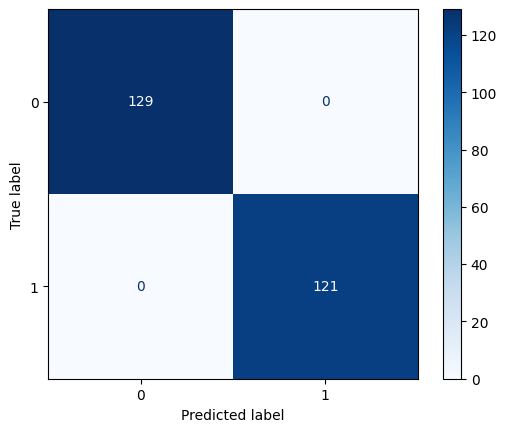

In [ ]:
fit_with_metrics(1000, 1, gaussian, 'sigmoid', 'gradient', 1)

## Обучение **ансамбля** перцептронов с помощью **градиентного спуска** с функцией активации **сигмоидой** на выборке **спирали**

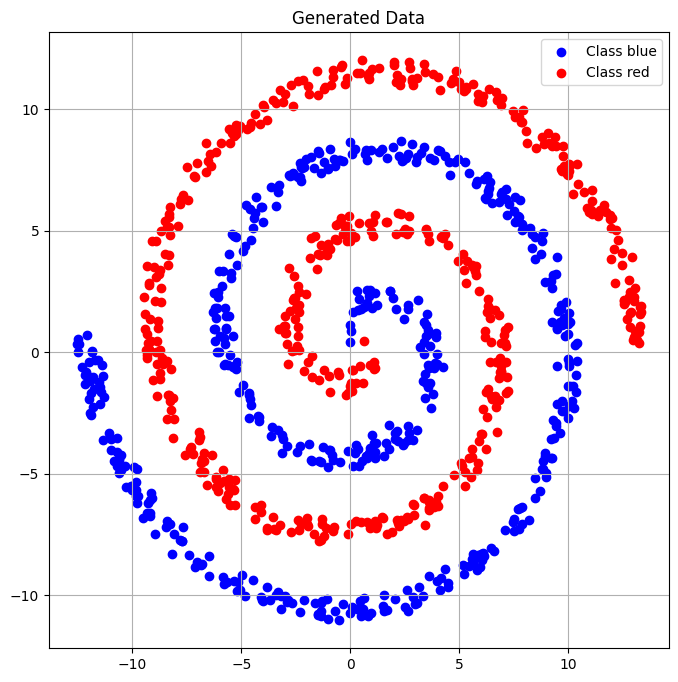

Fit time: 0.27512121200561523 seconds
Accuracy: 0.568


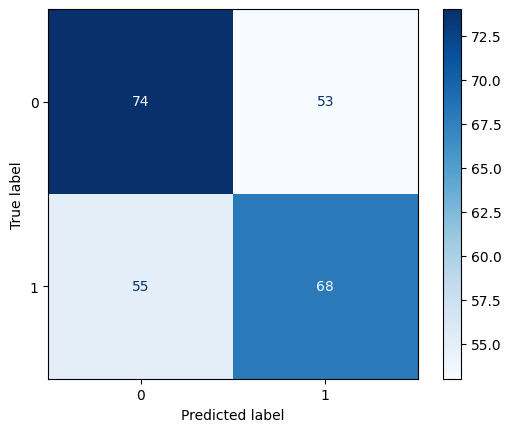

In [ ]:
fit_with_metrics(1000, 1, spiral, 'sigmoid', 'gradient', 10)

## Обучение **ансамбля** перцептронов с помощью **теоремы** с **ступенчатой** функцией активации на выборке **xor**

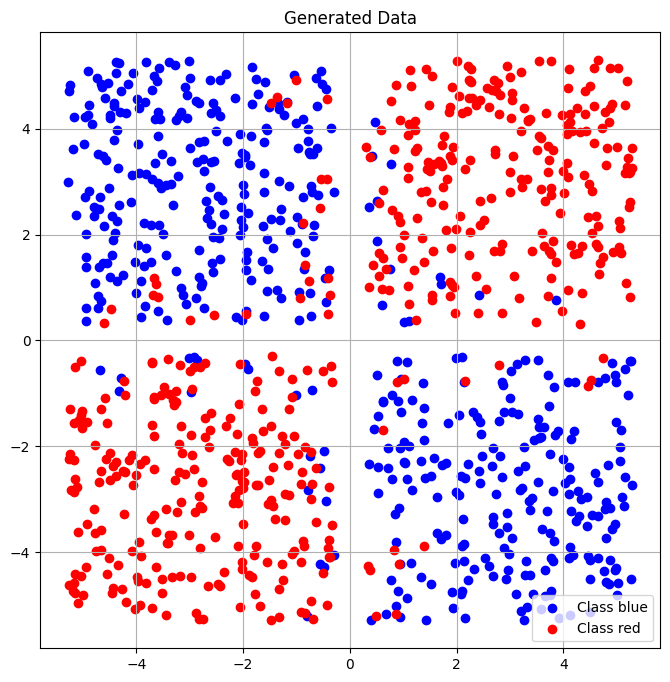

Fit time: 0.3122835159301758 seconds
Accuracy: 0.464


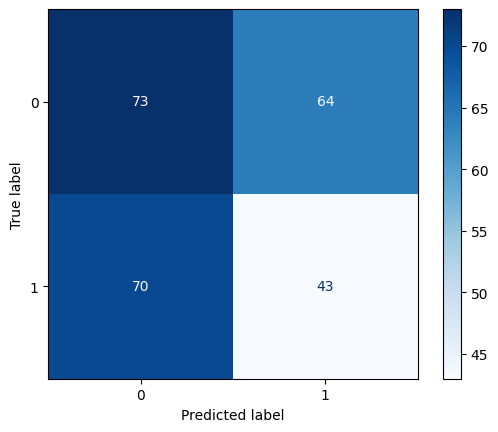

In [ ]:
fit_with_metrics(1000, 0.3, xor, 'step', 'theorem', 10)